In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import shapiro,normaltest,kstest


# PROBLEM STATEMENT

# DATA GATHERING

In [2]:
df=pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\LoanApprovalPrediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [3]:
df.shape

(598, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

# FEATURE ENGINEERING

In [7]:
## Handling missing values
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mean())

In [8]:
## Handling missing values
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [9]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

In [10]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

In [11]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
## Change Data types

In [13]:
L=LabelEncoder()
df["Gender"]=L.fit_transform(df["Gender"])

In [14]:
L=LabelEncoder()
df["Education"]=L.fit_transform(df["Education"])

In [15]:
L=LabelEncoder()
df["Self_Employed"]=L.fit_transform(df["Self_Employed"])

In [16]:
L=LabelEncoder()
df["Property_Area"]=L.fit_transform(df["Property_Area"])

In [17]:
L=LabelEncoder()
df["Loan_Status"]=L.fit_transform(df["Loan_Status"])

In [18]:
L=LabelEncoder()
df["Married"]=L.fit_transform(df["Married"])

In [19]:
df=df.drop("Loan_ID",axis=1)

In [20]:
## Find outliers

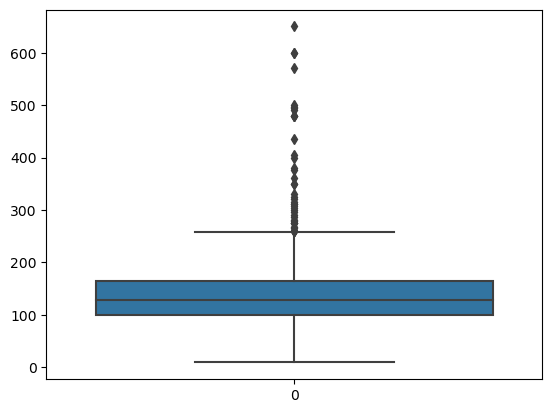

In [21]:
sns.boxplot(df["LoanAmount"])
plt.savefig("Loan_outlier")

In [22]:
## Handle outliers
def find_iqr(df,n):
    q1=df[n].quantile(0.25)
    q3=df[n].quantile(0.75)
    iqr=q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    print(lower_tail)
    print(upper_tail)
    df[n]=df[n].apply(lambda x: upper_tail if x>upper_tail else(lower_tail if x<lower_tail else x))
n="LoanAmount"
find_iqr(df,n)

4.75
258.75


In [23]:
n="ApplicantIncome"
find_iqr(df,n)

-1425.25
10048.75


In [24]:
n="CoapplicantIncome"
find_iqr(df,n)

-3486.0
5810.0


In [25]:
n="Credit_History"
find_iqr(df,n)

1.0
1.0


# FEATURE SELECTION

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int32  
 1   Married            598 non-null    int32  
 2   Dependents         598 non-null    float64
 3   Education          598 non-null    int32  
 4   Self_Employed      598 non-null    int32  
 5   ApplicantIncome    598 non-null    float64
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    int32  
 11  Loan_Status        598 non-null    int32  
dtypes: float64(6), int32(6)
memory usage: 42.2 KB


In [27]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.174335,0.048478,-0.028663,0.071923,0.193396,0.143403,-0.082361,NaN,-0.025794,0.021239
Married,0.369612,1.000000,0.347012,0.014369,-0.021441,0.020186,0.218828,0.176890,-0.101146,NaN,0.009224,0.093183
Dependents,0.174335,0.347012,1.000000,0.058415,0.040509,0.095264,-0.024947,0.143109,-0.098420,NaN,0.007734,0.003008
Education,0.048478,0.014369,0.058415,1.000000,-0.015204,-0.201948,-0.054000,-0.168877,-0.079167,NaN,-0.061758,-0.081617
Self_Employed,-0.028663,-0.021441,0.040509,-0.015204,1.000000,0.187990,-0.044100,0.094183,-0.033600,NaN,-0.023149,-0.005605
ApplicantIncome,0.071923,0.020186,0.095264,-0.201948,0.187990,1.000000,-0.212697,0.558669,-0.006844,NaN,-0.039763,-0.019665
CoapplicantIncome,0.193396,0.218828,-0.024947,-0.054000,-0.044100,-0.212697,1.000000,0.274825,-0.030905,NaN,-0.067478,0.015562
LoanAmount,0.143403,0.176890,0.143109,-0.168877,0.094183,0.558669,0.274825,1.000000,0.070857,NaN,-0.074121,-0.064334
Loan_Amount_Term,-0.082361,-0.101146,-0.098420,-0.079167,-0.033600,-0.006844,-0.030905,0.070857,1.000000,NaN,-0.071461,-0.017305
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df=df.drop("Credit_History",axis=1)

## CHECKING ASSUMPTION

### 1.LINEARITY

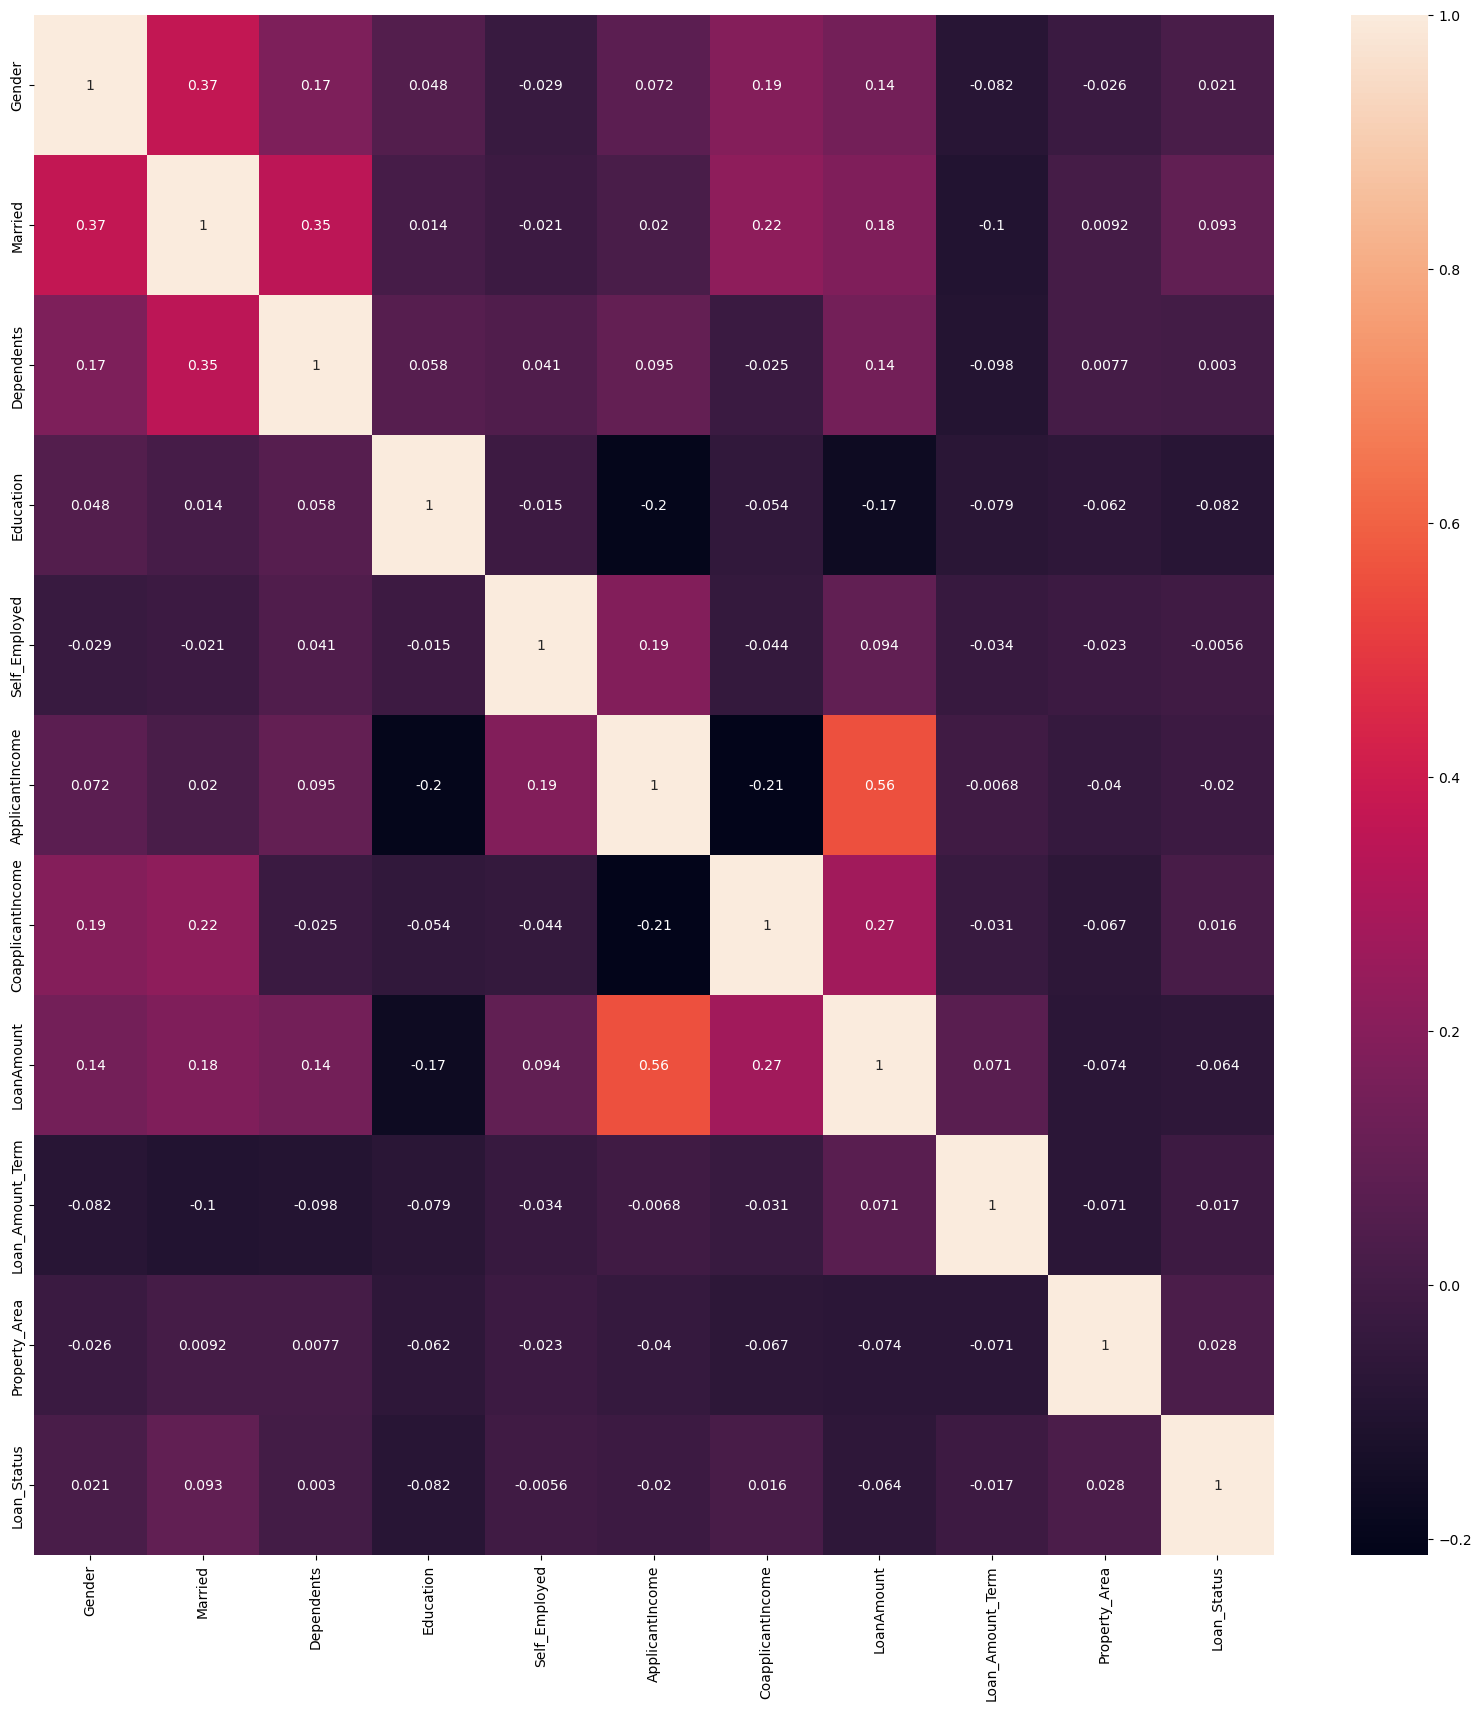

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.savefig("loan_heatmap")

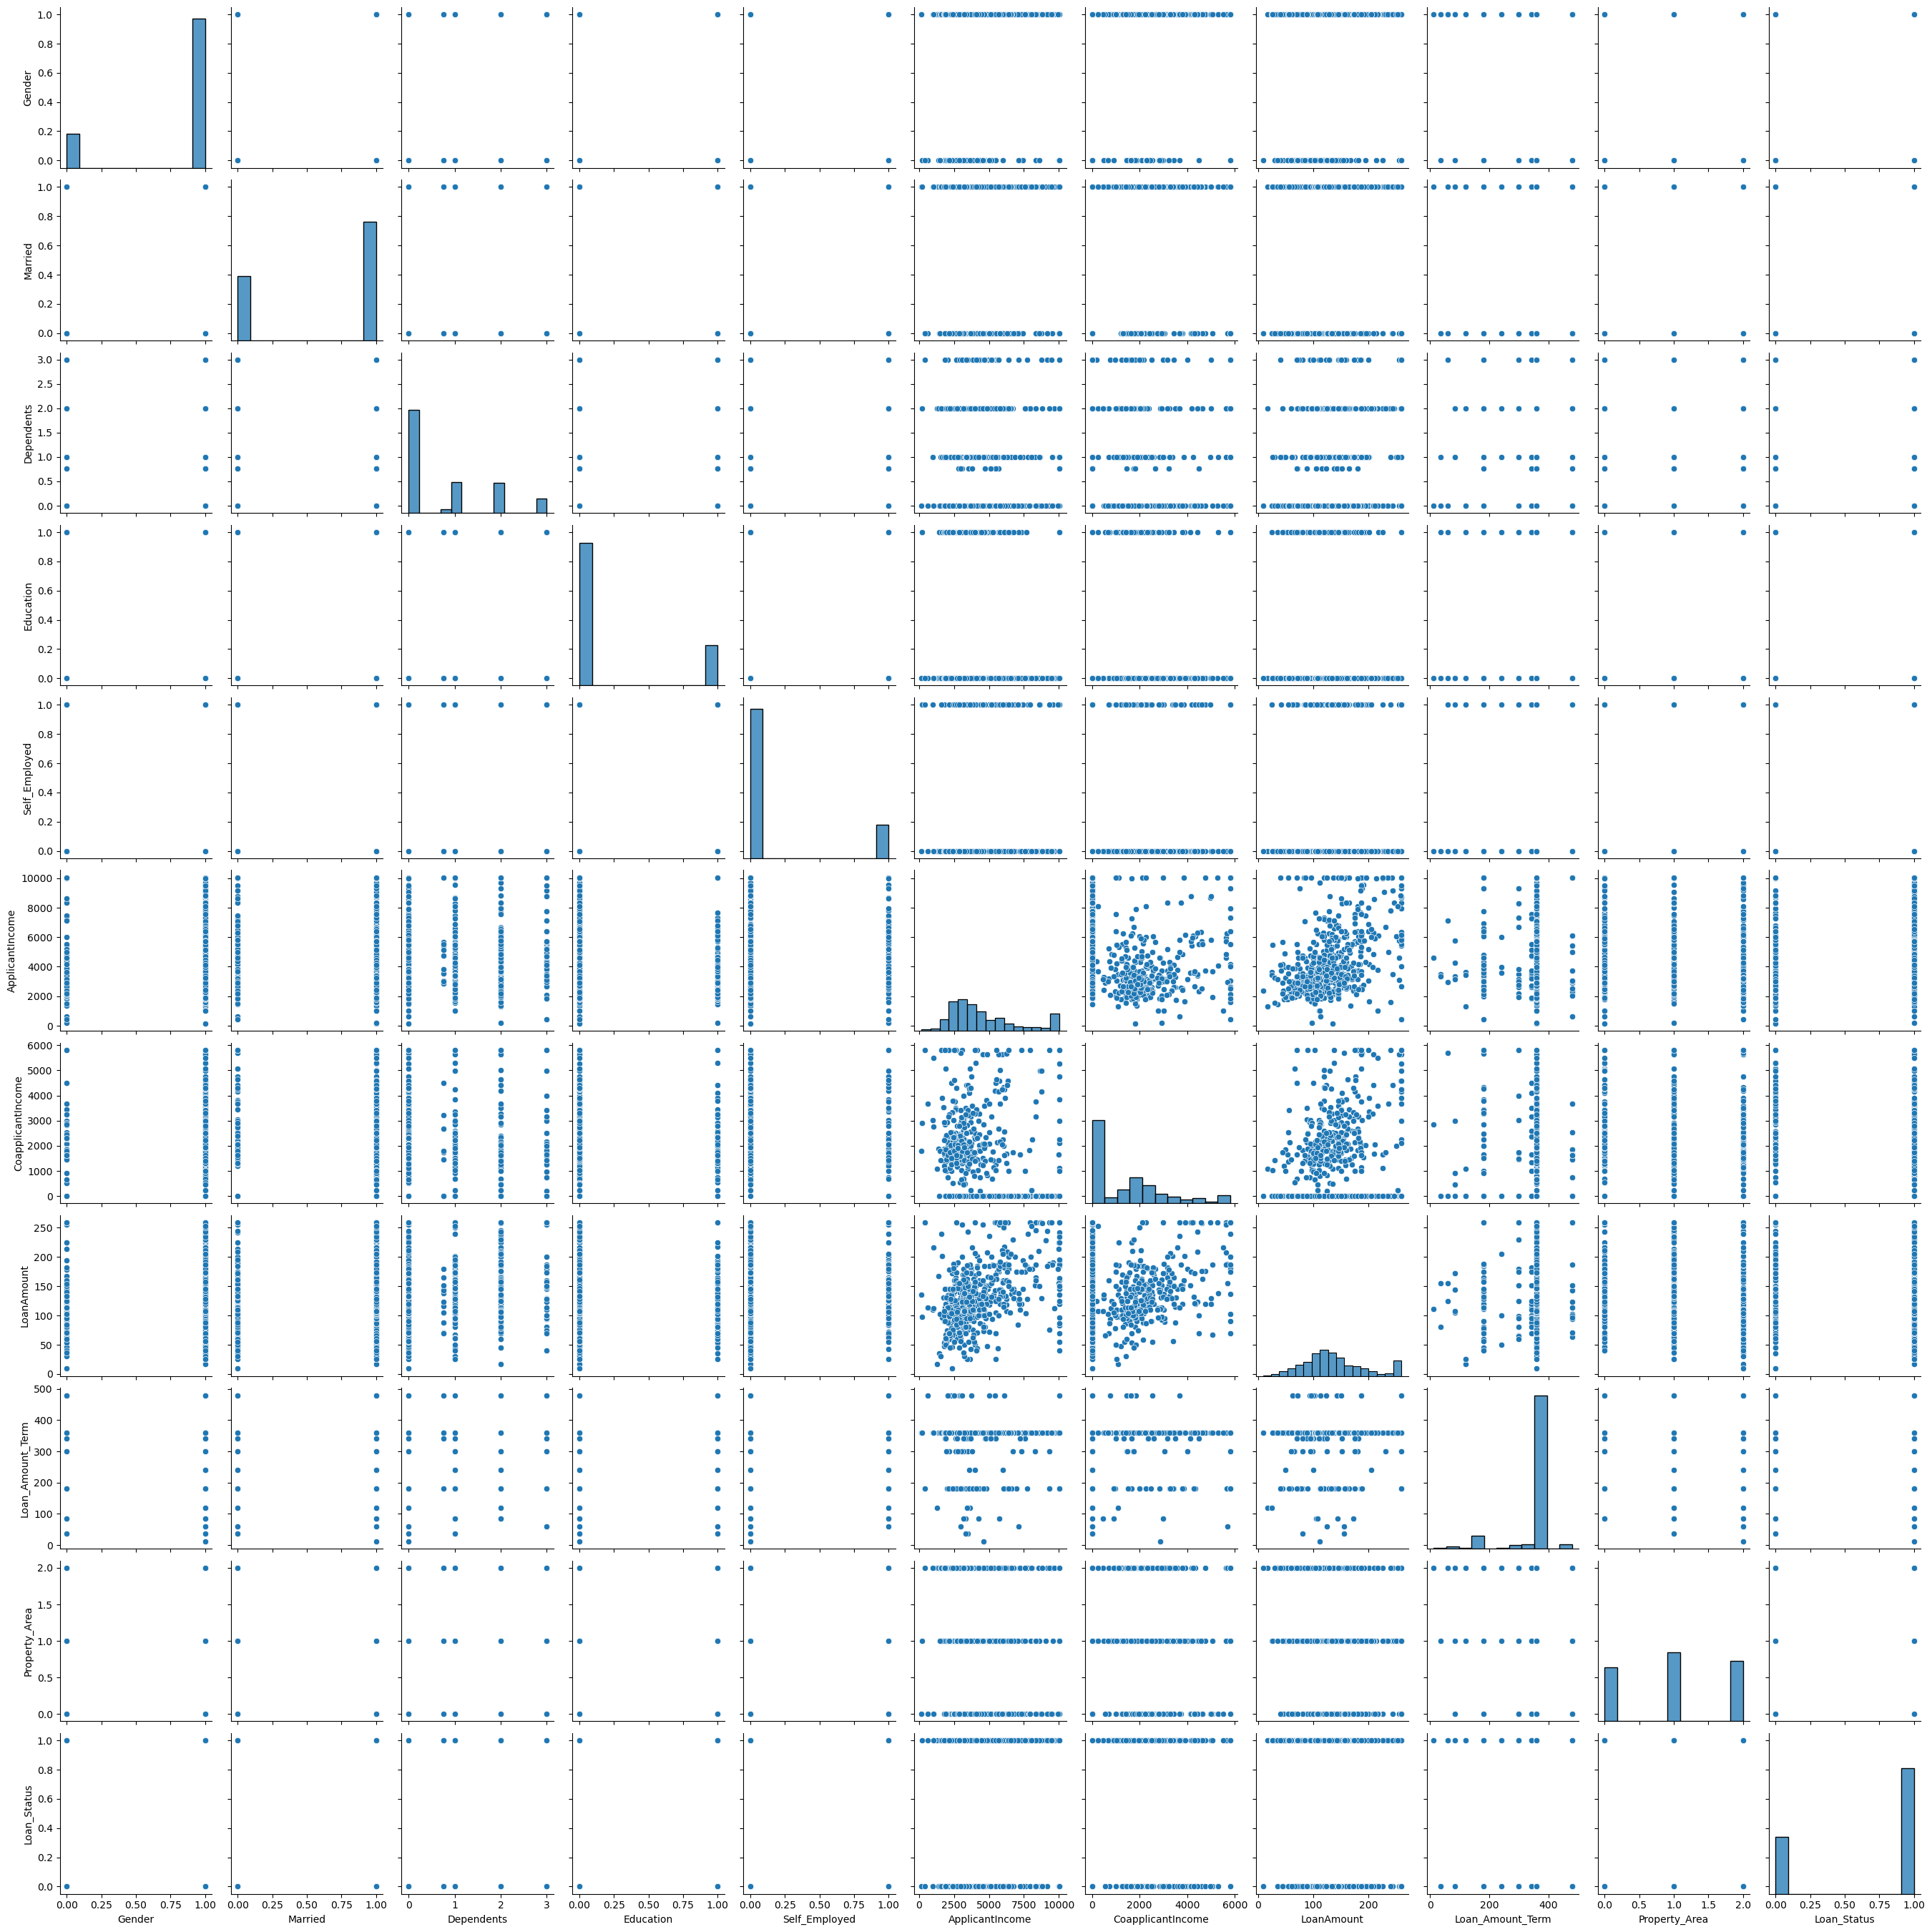

In [30]:
sns.pairplot(df)
plt.savefig("Loan_pair1")

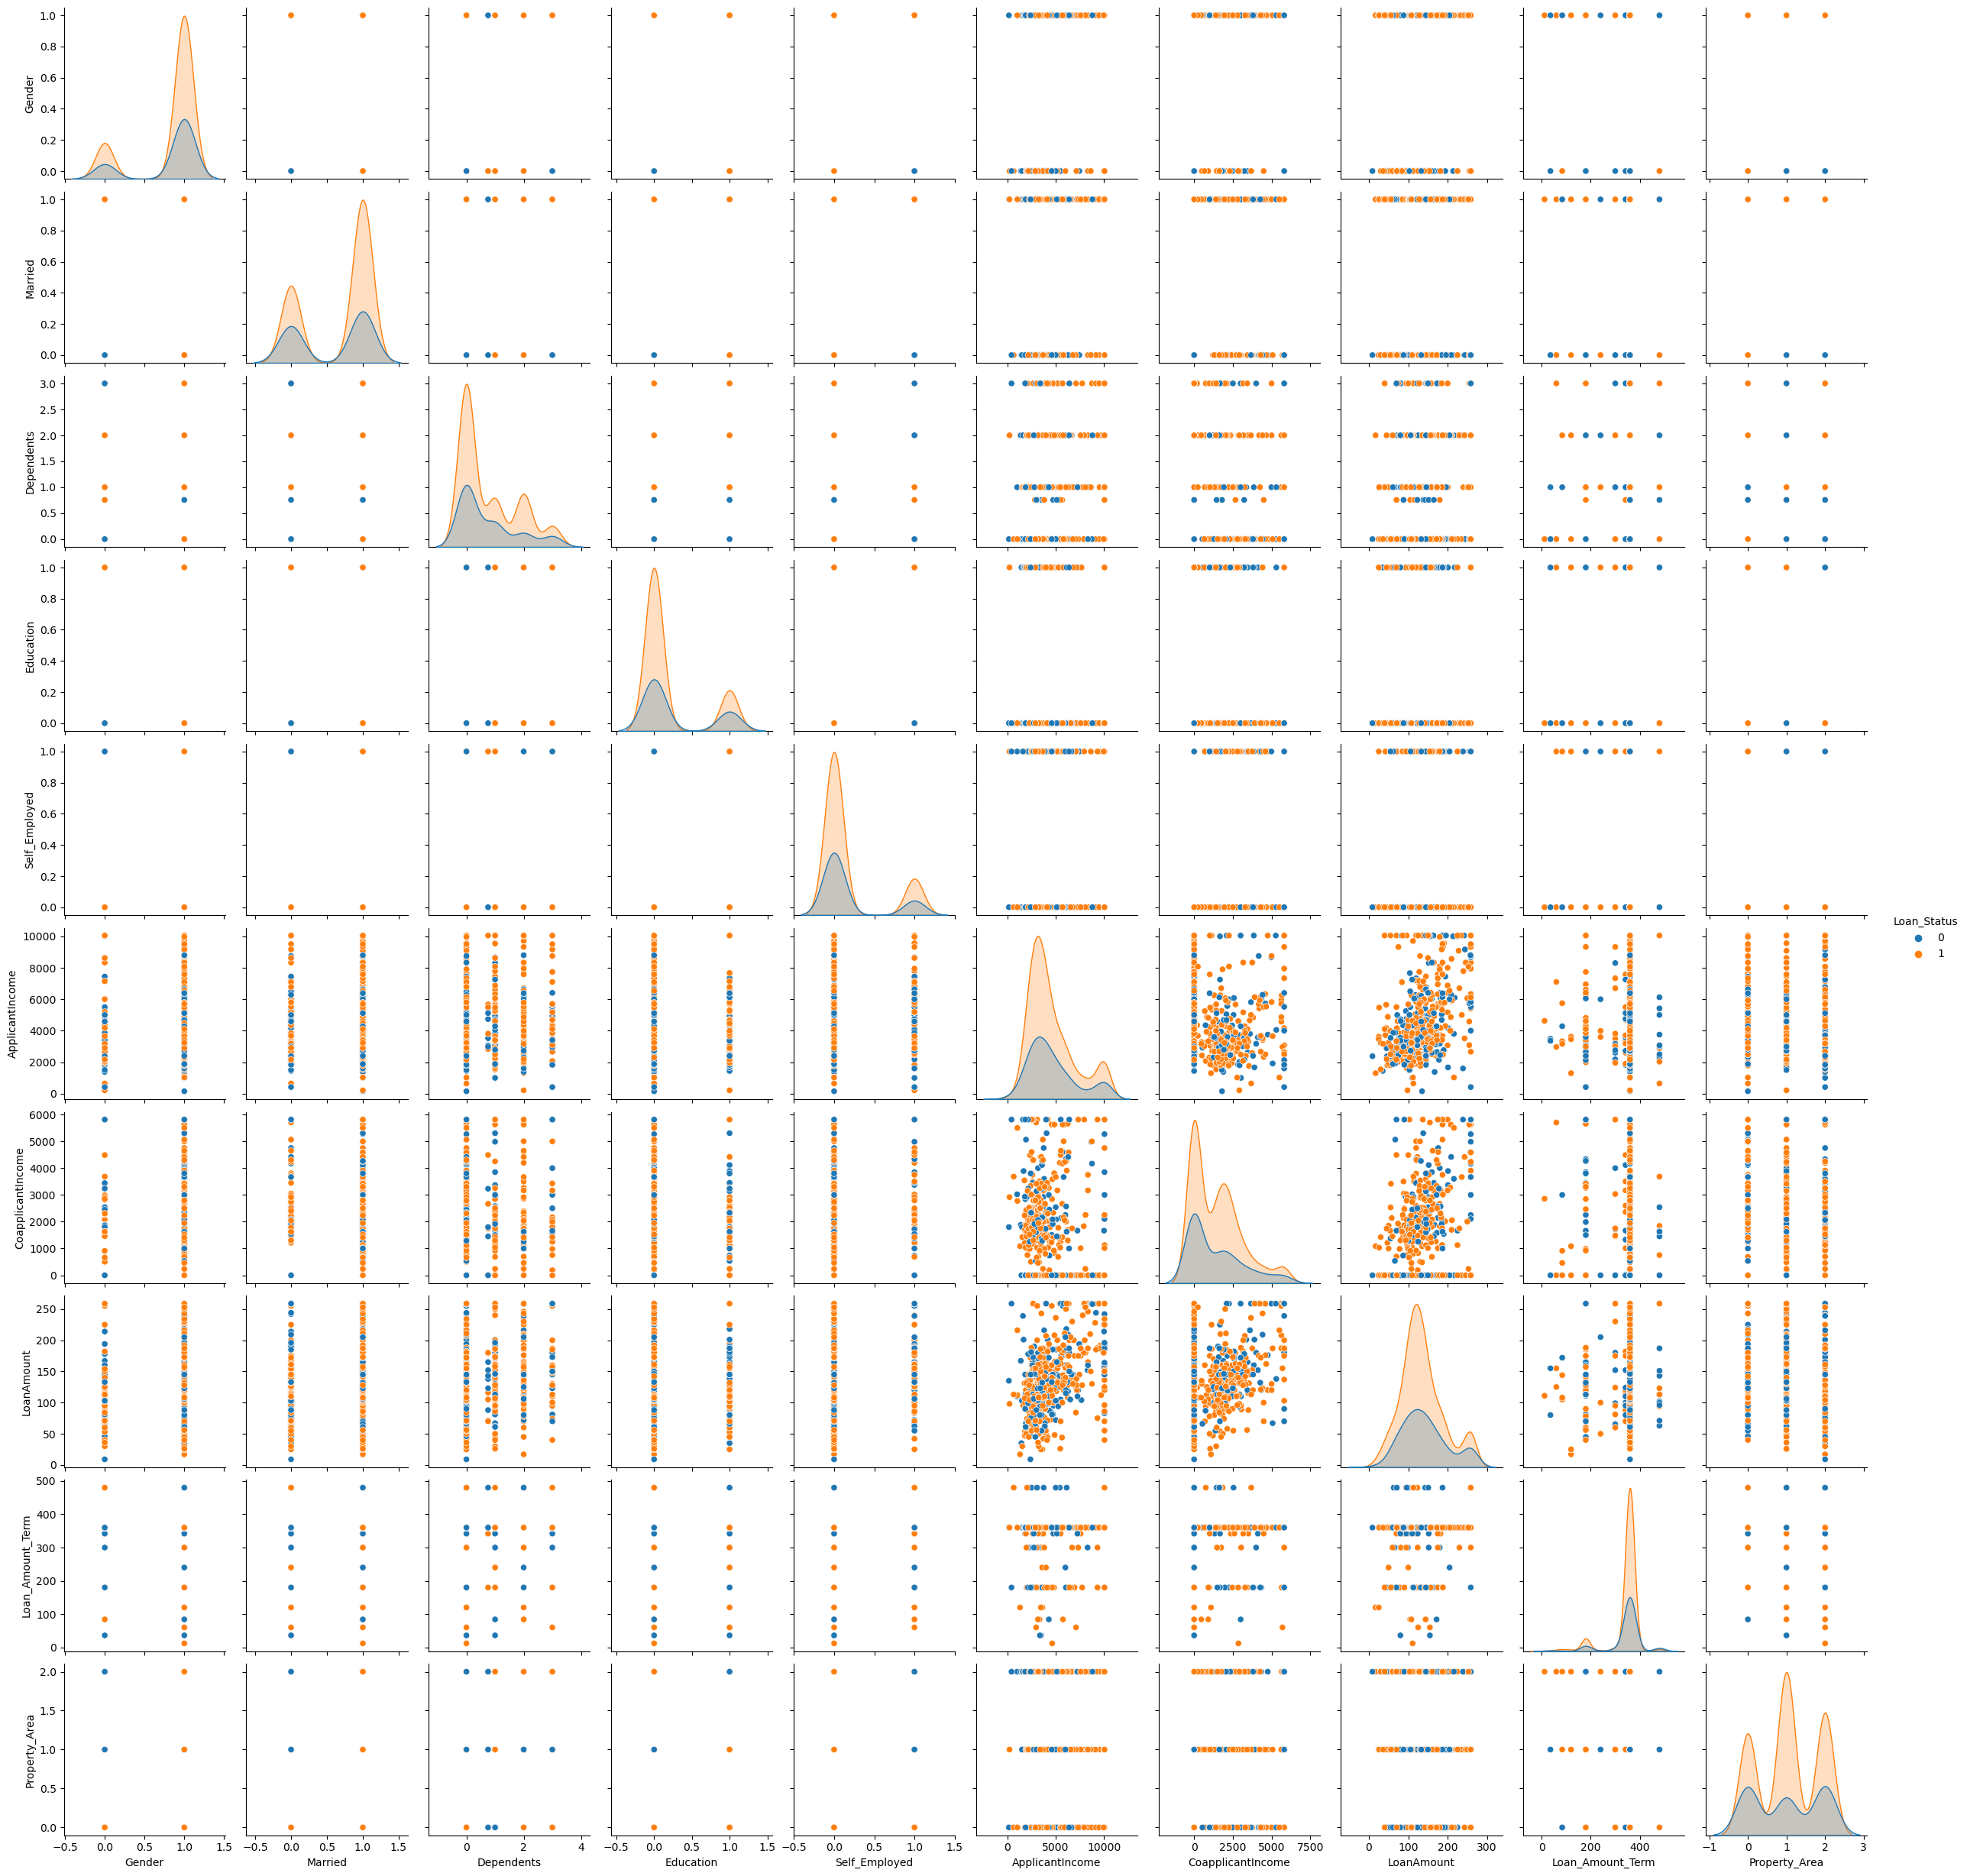

In [31]:
sns.pairplot(df,hue="Loan_Status")
plt.savefig("Loan_pair2")

### 2. NO MULTICOLINEARITY

In [32]:
df1=df.drop("Loan_Status",axis=1)

In [33]:
vif_df=pd.DataFrame()
vif_df["Columns"]=df1.columns
vif_df

,Columns
0,Gender
1,Married
2,Dependents
3,Education
4,Self_Employed
5,ApplicantIncome
6,CoapplicantIncome
7,LoanAmount
8,Loan_Amount_Term
9,Property_Area


In [34]:
vif_lst=[]
for i in range(df1.shape[1]):
    Vif=variance_inflation_factor(df.to_numpy(),i)
    vif_lst.append(Vif)
vif_lst

[6.133766156662931,
 3.840484691560734,
 1.862844719984765,
 1.3257916944704111,
 1.2731217716798733,
 8.705632115645662,
 2.584169077649271,
 14.229774135841616,
 10.475008780860824,
 2.5658684569740786]

In [35]:
vif_df["VIF"]=vif_lst
vif_df

,Columns,VIF
0,Gender,6.133766
1,Married,3.840485
2,Dependents,1.862845
3,Education,1.325792
4,Self_Employed,1.273122
5,ApplicantIncome,8.705632
6,CoapplicantIncome,2.584169
7,LoanAmount,14.229774
8,Loan_Amount_Term,10.475009
9,Property_Area,2.565868


In [36]:
df["Loan_Status"].value_counts()

1    411
0    187
Name: Loan_Status, dtype: int64

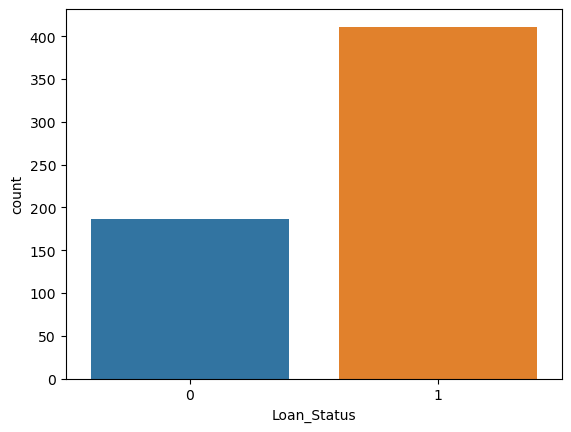

In [37]:
sns.countplot(x=df["Loan_Status"])
plt.savefig("Loan_count")

# MODEL TRAINING

In [38]:
x=df1
y=df["Loan_Status"]

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20,stratify=y)

In [40]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [41]:
log_reg_model=log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

# MODEL EVALUATION

In [42]:
ytrain_predict=log_reg_model.predict(xtrain)

In [43]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict)
print(class_report)
print("*"*55)

Accuracy : 0.6882845188284519
*******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.69      1.00      0.82       329

    accuracy                           0.69       478
   macro avg       0.34      0.50      0.41       478
weighted avg       0.47      0.69      0.56       478

*******************************************************


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
ytest_predict=log_reg_model.predict(xtest)

In [45]:
accuracy = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytest,ytest_predict)
print(class_report)
print("*"*55)

Accuracy : 0.6833333333333333
*******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

*******************************************************


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DECISION TREE

In [46]:
DT=DecisionTreeClassifier()
DT

DecisionTreeClassifier()

In [47]:
Dt_model=DT.fit(xtrain,ytrain)
Dt_model

DecisionTreeClassifier()

In [48]:
## Evaluation on training data
ytrain_predict1=Dt_model.predict(xtrain)

In [49]:
accuracy = accuracy_score(ytrain,ytrain_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.997907949790795
*******************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       1.00      1.00      1.00       329

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

*******************************************************


In [50]:
# Evaluation on testing data
ytest_predict1=Dt_model.predict(xtest)

In [51]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytest,ytest_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.6333333333333333
*******************************************************
              precision    recall  f1-score   support

           0       0.41      0.34      0.37        38
           1       0.72      0.77      0.74        82

    accuracy                           0.63       120
   macro avg       0.56      0.56      0.56       120
weighted avg       0.62      0.63      0.62       120

*******************************************************


In [52]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [53]:
Random_search_model  = RandomizedSearchCV(Dt_model,hyperparameters,cv=5)
Random_search_model

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [54]:
Random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [55]:
Random_search_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=16,
                       min_samples_split=10)

In [56]:
hyp_dt_model1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=11,
                       min_samples_split=11)

In [57]:
hyp_dt_model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=11,
                       min_samples_split=11)

In [58]:
yt_predict=hyp_dt_model1.predict(xtrain)
yt_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
accuracy = accuracy_score(ytrain,ytrain_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.997907949790795
*******************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       1.00      1.00      1.00       329

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

*******************************************************


In [60]:
ytest_predict1 = hyp_dt_model1.predict(xtest)
ytest_predict1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytest,ytest_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.675
*******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      0.99      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.49      0.40       120
weighted avg       0.47      0.68      0.55       120

*******************************************************


# RANDOM FOREST

In [62]:
rad=RandomForestClassifier()
rad

RandomForestClassifier()

In [63]:
radM=rad.fit(xtrain,ytrain)
radM

RandomForestClassifier()

In [64]:
ytrain_predict1=radM.predict(xtrain)

In [65]:
accuracy = accuracy_score(ytrain,ytrain_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.997907949790795
*******************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       149
           1       1.00      1.00      1.00       329

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

*******************************************************


In [66]:
ytest_predict1=radM.predict(xtest)

In [67]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytest,ytest_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.6333333333333333
*******************************************************
              precision    recall  f1-score   support

           0       0.35      0.18      0.24        38
           1       0.69      0.84      0.76        82

    accuracy                           0.63       120
   macro avg       0.52      0.51      0.50       120
weighted avg       0.58      0.63      0.59       120

*******************************************************


In [68]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,20),
    "min_samples_split" : np.arange(2,30),
    "min_samples_leaf" : np.arange(2,10),
    "max_features":['sqrt']
} 

In [69]:
random_search_model  = RandomizedSearchCV(radM,hyperparameters,error_score="raise",cv=5)
random_search_model

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [70]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [71]:
random_search_model.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=10)

In [72]:
hyp_dt_model2 = RandomForestClassifier(max_depth=14, min_samples_leaf=7, min_samples_split=8)

In [73]:
hyp_dt_model2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=14, min_samples_leaf=7, min_samples_split=8)

In [74]:
yt_predict=hyp_dt_model1.predict(xtrain)
yt_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [75]:
accuracy = accuracy_score(ytrain,ytrain_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.997907949790795
*******************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       149
           1       1.00      1.00      1.00       329

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

*******************************************************


In [76]:
ytest_predict1 = hyp_dt_model2.predict(xtest)
ytest_predict1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytest,ytest_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.6833333333333333
*******************************************************
              precision    recall  f1-score   support

           0       0.50      0.03      0.05        38
           1       0.69      0.99      0.81        82

    accuracy                           0.68       120
   macro avg       0.59      0.51      0.43       120
weighted avg       0.63      0.68      0.57       120

*******************************************************


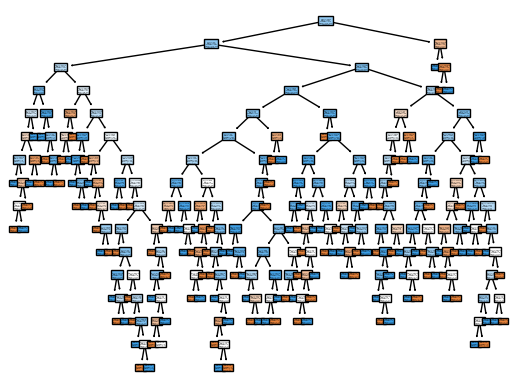

In [78]:
dt_plot = plot_tree(Dt_model,class_names=["Yes","No"],filled=True)
plt.savefig("Loan_tree")

In [79]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
593,0,0,0.0,0,0,2900.0,0.0,71.0,360.0,0,1
594,1,1,3.0,0,0,4106.0,0.0,40.0,180.0,0,1
595,1,1,1.0,0,0,8072.0,240.0,253.0,360.0,2,1
596,1,1,2.0,0,0,7583.0,0.0,187.0,360.0,2,1
597,0,0,0.0,0,1,4583.0,0.0,133.0,360.0,1,0


In [80]:
class Linear_reg():
    def Input(self):
        self.Gender = int(input("Enter Gender: "))
        self.Married = float(input("Enter Married_status: "))
        self.Dependents = float(input("Enter Dependents: "))
        self.Education = float(input("Enter Education: "))
        self.Self_Employed = float(input("Enter Self_Employed: "))
        self.ApplicantIncome = float(input("Enter ApplicantIncome: "))
        self.CoapplicantIncome = float(input("Enter CoapplicantIncome: "))
        self.LoanAmount = float(input("Enter LoanAmount: "))
        self.Loan_Amount_Term = float(input("Enter Loan_Amount_Term: "))
        self.Property_Area = float(input("Enter Property_Area: "))
    def Output(self):
        df = pd.DataFrame([[self.Gender, self.Married, self.Dependents,self.Education, self.Self_Employed, self.ApplicantIncome,self.CoapplicantIncome,self.LoanAmount,self.Loan_Amount_Term,self.Property_Area]], columns=["Gender","Married","Dependents","Education","Self_Employed", "ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Property_Area"])
        return hyp_dt_model2.predict(df)


In [81]:
obj=Linear_reg()
obj

In [ ]:
obj.Input()

In [ ]:
obj.Output()